# DAT405 Introduction to Data Science and AI 
## 2022-2023, Reading Period 3
## Assignment 4: Spam classification using Naïve Bayes 
**Authors: *Niclas Lindmark, Anton Johansson, Noa Sjöstrand***

This assignmetn has three obligatory questions which will be grades as PASS/FAIL. Questions 4-5 are optional and will not be graded, but can be interesting for students aiming for higher grades.

The exercise takes place in this notebook environment where you can chose to use Jupyter or Google Colabs. We recommend you use Google Colabs as it will facilitate remote group-work and makes the assignment less technical. 
Hints:
You can execute certain linux shell commands by prefixing the command with `!`. You can insert Markdown cells and code cells. The first you can use for documenting and explaining your results the second you can use writing code snippets that execute the tasks required.  

In this assignment you will implement a Naïve Bayes classifier in Python that will classify emails into spam and non-spam (“ham”) classes.  Your program should be able to train on a given set of spam and “ham” datasets. 
You will work with the datasets available at https://spamassassin.apache.org/old/publiccorpus/. There are three types of files in this location: 
-	easy-ham: non-spam messages typically quite easy to differentiate from spam messages. 
-	hard-ham: non-spam messages more difficult to differentiate 
-	spam: spam messages 

**Execute the cell below to download and extract the data into the environment of the notebook -- it will take a few seconds.** If you chose to use Jupyter notebooks you will have to run the commands in the cell below on your local computer, with Windows you can use 
7zip (https://www.7-zip.org/download.html) to decompress the data.

**What to submit:** 
Convert the notebook to a pdf-file and submit it. Make sure all cells are executed so all your code and its results are included. Double check the pdf displays correctly before you submit it.

In [1]:
#Download and extract data
## uncomment to download files
#!wget https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
#!wget https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
#!wget https://spamassassin.apache.org/old/publiccorpus/20021010_spam.tar.bz2
#!tar -xjf 20021010_easy_ham.tar.bz2
#!tar -xjf 20021010_hard_ham.tar.bz2
#!tar -xjf 20021010_spam.tar.bz2

*The* data is now in the three folders `easy_ham`, `hard_ham`, and `spam`.

In [2]:
#!ls -lah

### 1. Preprocessing: 
Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text (in the optional part further down can experiment with filtering out the headers and footers). 
1.	We don’t want to train and test on the same data (it might help to reflect on why if you don't recall). Split the spam and the ham datasets in a training set and a test set. (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`). Use easy_ham for quesions 1 and 2.


In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns




In [4]:



hard_ham = os.listdir('hard_ham')
hard_ham_list = []
for x in hard_ham:
    with open('hard_ham/'+x, encoding="ISO-8859-1") as f:
        text = f.read()
    hard_ham_list.append(text)

spam = os.listdir('spam')
spam_list = []
for x in spam:
    with open('spam/'+x, encoding="ISO-8859-1") as f:
        text = f.read()
    spam_list.append(text)

easy_ham = os.listdir('easy_ham')
easy_ham_list = []
for x in easy_ham:
    with open('easy_ham/'+x, encoding="ISO-8859-1") as f:
        text = f.read()
    easy_ham_list.append(text)




# Write your pre-processing code here


### 2. Write a Python program that: 
1.	Uses the four datasets from Qustion 1 (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`) 
2.	Trains a Naïve Bayes classifier (use the [scikit-learn library](https://scikit-learn.org/stable/)) on `hamtrain` and `spamtrain`, that classifies the test sets and reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets. You can use `CountVectorizer` ([Documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)) to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifier in scikit-learn ([Documentation here](https://scikit-learn.org/stable/modules/naive_bayes.html)). Test two of these classifiers that are well suited for this problem:
- Multinomial Naive Bayes  
- Bernoulli Naive Bayes. 

Please inspect the documentation to ensure input to the classifiers is appropriate before you start coding. 



[Text(0.5, 1.0, 'MultinomialNB, score = 0.975')]

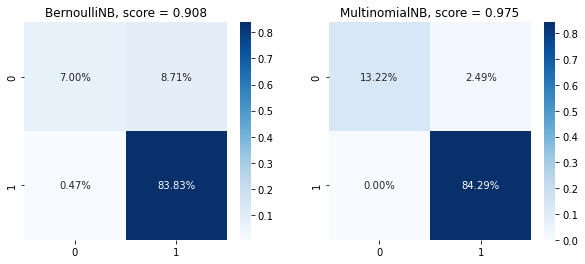

In [12]:
hamtrain, hamtest = train_test_split(easy_ham_list, train_size=0.8)
spamtrain, spamtest = train_test_split(spam_list, train_size=0.8)
hard_hamtrain, hard_hamtest = train_test_split(hard_ham_list, train_size=0.8)


vectorizer = CountVectorizer(analyzer='word')

bNB = BernoulliNB()
mNB = MultinomialNB()

hamspam_train = vectorizer.fit_transform(hamtrain+spamtrain)

ham_result = [1 for _ in range(len(hamtrain))]
spam_result = [0 for _ in range(len(spamtrain))]

hamspam_result = np.array(ham_result+spam_result)

bNB.fit(hamspam_train, hamspam_result)
mNB.fit(hamspam_train, hamspam_result)


hamspam_test = vectorizer.transform(hamtest+spamtest)

ham_test_result = [1 for _ in range(len(hamtest))]
spam_test_result = [0 for _ in range(len(spamtest))]

hamspam_test_result = np.array(ham_test_result+spam_test_result)

bNB_score = bNB.score(hamspam_test, hamspam_test_result)
mNB_score = mNB.score(hamspam_test, hamspam_test_result)

fig, ax =plt.subplots(1,2)
fig.set_figwidth(10)
pred = bNB.predict(hamspam_test)
Bernoulli_CM = confusion_matrix(hamspam_test_result,pred)
sns.heatmap(Bernoulli_CM/np.sum(Bernoulli_CM), annot=True, fmt='.2%', cmap='Blues',ax=ax[0]).set(title=f"BernoulliNB, score = {round(bNB_score,3)}")
pred = mNB.predict(hamspam_test)
Multinomial_CM = confusion_matrix(hamspam_test_result,pred)
sns.heatmap(Multinomial_CM/np.sum(Multinomial_CM), annot=True, fmt='.2%', cmap='Blues',ax=ax[1]).set(title=f"MultinomialNB, score = {round(mNB_score,3)}")


### 3.Run on hard ham:
Run the two models from Question 2 on spam versus hard-ham and compare to easy-ham results.

200
400


[Text(0.5, 1.0, 'MultinomialNB, score = 0.748')]

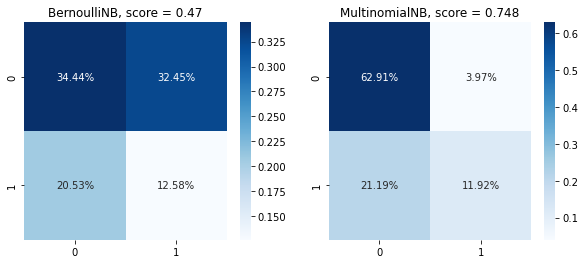

In [13]:

spamtrain, spamtest = train_test_split(spam_list, train_size=0.8)
hard_hamtrain, hard_hamtest = train_test_split(hard_ham_list, train_size=0.8)

hard_ham_result = [1 for _ in range(len(hard_hamtrain))]

spam_result = [0 for _ in range(len(spamtrain))]


hard_hamspam_result = np.array(hard_ham_result+spam_result)

hard_hamspam_test = vectorizer.transform(hard_hamtest+spamtest)

hard_ham_test_result = [1 for _ in range(len(hard_hamtest))]
spam_test_result = [0 for _ in range(len(spamtest))]

hard_hamspam_test_result = np.array(hard_ham_test_result+spam_test_result)

bNB_score = bNB.score(hard_hamspam_test, hard_hamspam_test_result)
mNB_score = mNB.score(hard_hamspam_test, hard_hamspam_test_result)

fig, ax =plt.subplots(1,2)
fig.set_figwidth(10)
pred = bNB.predict(hard_hamspam_test)
Bernoulli_CM = confusion_matrix(hard_hamspam_test_result,pred)
sns.heatmap(Bernoulli_CM/np.sum(Bernoulli_CM), annot=True, fmt='.2%', cmap='Blues',ax=ax[0]).set(title=f"BernoulliNB, score = {round(bNB_score,3)}")
pred = mNB.predict(hard_hamspam_test)
Multinomial_CM = confusion_matrix(hard_hamspam_test_result,pred)
sns.heatmap(Multinomial_CM/np.sum(Multinomial_CM), annot=True, fmt='.2%', cmap='Blues',ax=ax[1]).set(title=f"MultinomialNB, score = {round(mNB_score,3)}")




Answer: If we compare the results between the two sets of data there is an obvious difference in performance. The performance of both models were superior on the easyham dataset compared to the hardham dataset. Also the multinominal model performed better in both cases as you can see in the confuision matrices. The bernoulli model performed remarkably poorly on the hardham with an accuracy score of only 47%. 
We have printed the accuracy score in the titles which is the mean accuracy of the given test data and labels. 

### 4.	OPTIONAL - NOT MARKED: 
To avoid classification based on common and uninformative words it is common to filter these out. 

**a.** Think about why this may be useful. Show a few examples of too common and too uncommon words. 

**b.** Use the parameters in scikit-learn’s `CountVectorizer` to filter out these words. Update the program from point 2 and run it on easy ham vs spam and hard ham vs spam and report your results.

In [7]:
#Write your code here

### 5. OPTIONAL - NOT MARKED: Eeking out further performance
Filter out the headers and footers of the emails before you run on them. The format may vary somewhat between emails, which can make this a bit tricky, so perfect filtering is not required. Run your program again and answer the following questions: 
- Does the result improve from 3 and 4? 
- What do you expect would happen if your training set were mostly spam messages while your test set were mostly ham messages or vice versa? 
- Look at the `fit_prior` parameter. What does this parameter mean? Discuss in what settings it can be helpful (you can also test your hypothesis). 

In [8]:
#Write your code here